# **Case 2 Komputasi Statistika**

### Anggota Kelompok 9
| No. | Nama| NPM|
|:---:|-----|:---:|
|1.|Divaya Syifa Susilobudi|2106650790|
|2.|Selvira Salsabila|2106656232|
|3.|Zahrah Mahfuzah|2106704004|
|3.|Niken Salsabila Helmelia|2106724933|
|4.|Chatlea Shakira Haq|2106725116|

# **Case Study**

**Gaussian Mixture Model**

Gaussian Mixture Models (GMM) efektif untuk representasi densitas multimodel. Pada eksperimen ini Parameter GMM diestimasi dengan menggunakan algoritma Expectation Maximization (EM) yang hasilnya ditampilkan untuk dataset yang diberikan pada link berikut: https://archive.ics.uci.edu/ml/datasets/iris

Pertanyaan:

A. Cobalah lakukan pengelompokan pada data 2D:
1.   Petal Length vs Petal Width
2.   Sepal Length vs Sepal Width

dan lihat apakah dapat menghasilkan cluster yang sebenarnya? (Bayangkan kita tidak memiliki label spesies pada data ini dan ingin membagi bunga menjadi beberapa spesies)

Anda boleh memodifikasi jumlah cluster yang berubah-ubah dengan pendekatan berikut:
1. Pendekatan K-Means Clustering
2. Pendekatan GMM 
3. Pendekatan GMM menggunakan EM

B. Prediksi cluster untuk setiap titik data untuk pendekatan K-Means Clustering dan GMM pada ke dua data 2D di atas. Analisalah hasil perbandingan dari K-Means Clustering dan GMM Clustering.



Model campuran Gaussian dengan struktur kovarians yang berbeda:
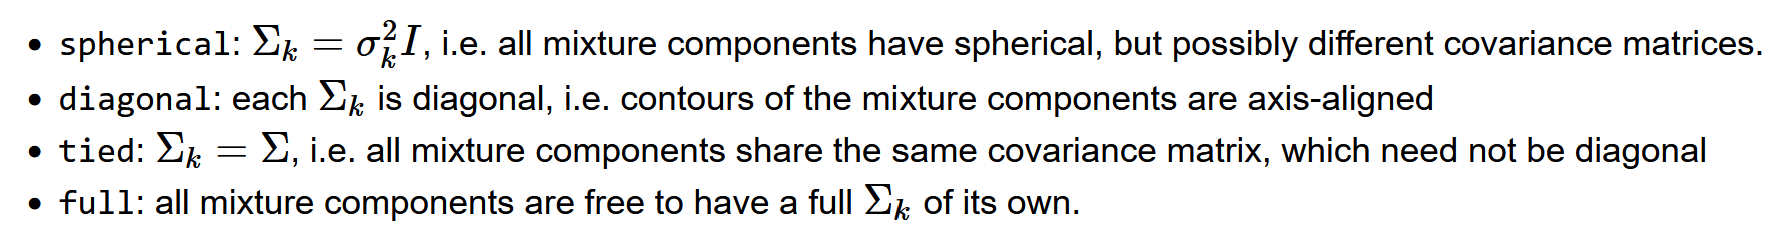

### **IMPORT MODULE**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

"Done"

'Done'

### **IMPORT DATA SET**

In [ ]:
#Akan dilakukan import dataset
url = 'https://raw.githubusercontent.com/gianiarda/latihan2/main/Iris.csv'
data = pd.read_csv(url)

In [ ]:
#Akan ditampilkan 5 data teratas
print(data)  

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [ ]:
#Akan ditampilkan 5 data secara acak
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
109,110,7.2,3.6,6.1,2.5,Iris-virginica
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
16,17,5.4,3.9,1.3,0.4,Iris-setosa
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
#Split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm
8      9            4.4           2.9            1.4
19    20            5.1           3.8            1.5
104  105            6.5           3.0            5.8
142  143            5.8           2.7            5.1
98    99            5.1           2.5            3.0
9          Iris-setosa
55     Iris-versicolor
103     Iris-virginica
50     Iris-versicolor
18         Iris-setosa
Name: Species, dtype: object


In [ ]:
#See how many samples we have of each species 
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### **VISUALISASI PENGELOMPOKAN**

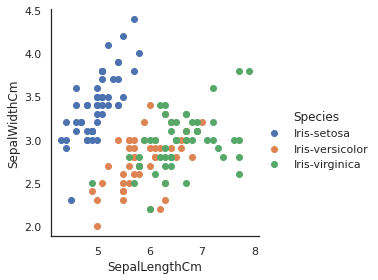

In [ ]:
#Use seaborn to make scatter plot showing species for each sample
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

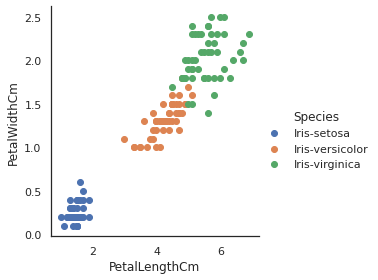

In [ ]:
# do same for petals
sns.FacetGrid(data, hue="Species", size=4) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

Dapat diketahui berdasarkan hasil visualisasi bahwa spesies ini hampir dapat dipisahkan secara linier dengan ukuran petal, tetapi ukuran sepal lebih beragam.

### **K-MEANS CLUSTERING**

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

 **Untuk n = 3**

In [ ]:
#Try clustering on the 4d data and see if can reproduce the actual clusters.
#ie imagine we don't have the species labels on this data and wanted to
#Divide the flowers into species. could set an arbitrary number of clusters
#and try dividing them up into similar clusters.

#We happen to know there are 3 species, so let's find 3 species and see
# if the predictions for each point matches the label in y.

from sklearn.cluster import KMeans

nclusters_3 = 3 # this is the k in kmeans
seed = 0

km_3 = KMeans(n_clusters=nclusters_3, random_state=seed)
km_3.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans_3 = km_3.predict(X_scaled)
y_cluster_kmeans_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from sklearn import metrics
score_3 = metrics.silhouette_score(X_scaled, y_cluster_kmeans_3)
score_3

0.4262689752753905

**Untuk n = 2**

In [ ]:
from sklearn.cluster import KMeans

nclusters_2 = 2 # this is the k in kmeans
seed = 0

km_2 = KMeans(n_clusters=nclusters_2, random_state=seed)
km_2.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans_2 = km_2.predict(X_scaled)
y_cluster_kmeans_2

from sklearn import metrics
score_2 = metrics.silhouette_score(X_scaled, y_cluster_kmeans_2)
score_2

0.545023998832265

**Untuk n = 5**

In [ ]:
from sklearn.cluster import KMeans

nclusters_5 = 5 # this is the k in kmeans
seed = 0

km_5 = KMeans(n_clusters=nclusters_5, random_state=seed)
km_5.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans_5 = km_5.predict(X_scaled)
y_cluster_kmeans_5

from sklearn import metrics
score_5 = metrics.silhouette_score(X_scaled, y_cluster_kmeans_5)
score_5

0.3180437153252693

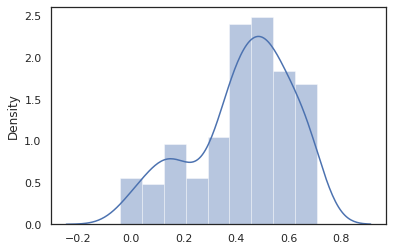

In [ ]:
scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

**Silhouette score** - a value near +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

**KESIMPULAN:**

Apabila menggunakan K-Means maka harus dicari silhouette score yang paling tinggi untuk mendapatkan nilai yang paling baik untuk k kluster. Hal ini dapat dilihat pada hasil jika digunakan n = 3 (sesuai panduan), n = 2, dan n = 5. Dapat dilihat n = 2 menghasilkan silhouette score paling tinggi untuk data ini.

### **GMM Clustering**

**Untuk n = 3**

In [ ]:
from sklearn.mixture import GaussianMixture

gmm_3 = GaussianMixture(n_components=3)
gmm_3.fit(X_scaled)

# predict the cluster for each data point
y2_cluster_gmm_3 = gmm_3.predict(X_scaled)
y2_cluster_gmm_3

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Untuk n = 2**

In [ ]:
from sklearn.mixture import GaussianMixture

gmm_2 = GaussianMixture(n_components=2)
gmm_2.fit(X_scaled)

# predict the cluster for each data point
y2_cluster_gmm_2 = gmm_2.predict(X_scaled)
y2_cluster_gmm_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**Untuk n = 5**

In [ ]:
from sklearn.mixture import GaussianMixture

gmm_5 = GaussianMixture(n_components=5)
gmm_5.fit(X_scaled)

# predict the cluster for each data point
y2_cluster_gmm_5 = gmm_5.predict(X_scaled)
y2_cluster_gmm_5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 1, 4, 4, 4, 2,
       4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### **PENDEKATAN GMM DENGAN EM**

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn import cluster, datasets

iris = datasets.load_iris()

In [ ]:
# Contoh Mencoba GMM dengan jenis covarians yang berbeda pada data 2d
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,2:4]) ## fits mixture model menggunakan EM

In [ ]:
colors = ['purple', 'turquoise', 'red']
markers = ['+','*','x']

In [ ]:
#helper function to visualise covariance structure of fitted Gaussian components
from matplotlib.patches import Ellipse
def plot_cov_ellipse(cov, pos, col='b', nstd=2, ax=None, **kwargs):
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]
    if ax is None:
        ax = plt.gca()
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, color=col, alpha=0.2,**kwargs)
    ax.add_artist(ellip)
    return ellip

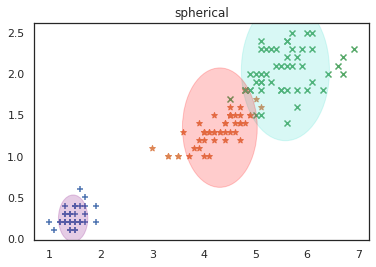

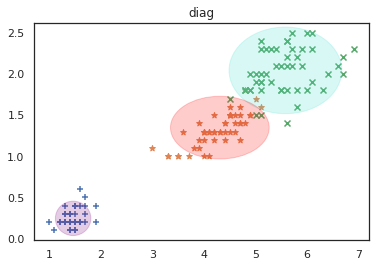

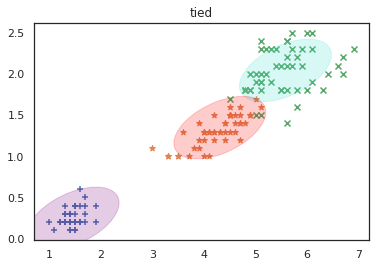

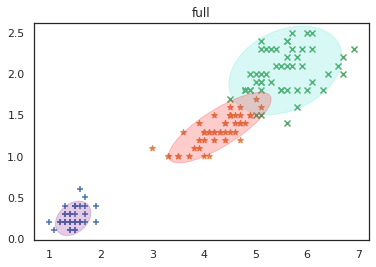

In [ ]:
#Contoh Code Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n])
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        #print(cov)
        pos = estimator.means_[n]
        #print(pos)
        plot_cov_ellipse(cov,pos,col=color)
    plt.title(name)
    plt.show()


Berdasarkan visualisasi, GMM  lebih baik digunakan untuk menemukan kelompok clustering yang sebenarnya. Hal ini karena GMM mencoba untuk menyesuaikan cluster yang mungkin terdistribusi normal dalam data ini. Sedangkan K-Means bersifat bias terhadap cluster yang terdistribusi spherical.

### **COMPARING K-MEANS AND GMM CLUSTERING** 

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score


In [ ]:
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

score_kmeans_3 = adjusted_rand_score(y, y_cluster_kmeans_3)
print('Score K-Means : ', score_kmeans_3)

score_gmm_3 = adjusted_rand_score(y, y2_cluster_gmm_3)
print(' Score GMM : ', score_gmm_3)

Score K-Means :  0.7222043170868028
 Score GMM :  0.4808350017427592


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

score_kmeans_2 = adjusted_rand_score(y, y_cluster_kmeans_2)
print('Score K-Means : ', score_kmeans_2)

score_gmm_2 = adjusted_rand_score(y, y2_cluster_gmm_2)
print(' Score GMM : ', score_gmm_2)

Score K-Means :  0.5681159420289855
 Score GMM :  0.5681159420289855


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

score_kmeans_5 = adjusted_rand_score(y, y_cluster_kmeans_5)
print('Score K-Means : ', score_kmeans_5)

score_gmm_5 = adjusted_rand_score(y, y2_cluster_gmm_5)
print(' Score GMM : ', score_gmm_5)

Score K-Means :  0.6130777415108289
 Score GMM :  0.7487743963120905


 **KESIMPULAN:**

Dalam kasus ini, ***Gaussian Mixture Model* (GMM) *Clustering*** lebih baik dibandingkan dengan ***K-Means*** untuk menemukan label aktual dari spesies karena data set yang digunakan tidak terlalu besar sehingga waktu yang dibutuhkan juga tidak terlalu lama. Selain itu, dari program perhitungan menggunakan *rand score* di atas didapatkan score GMM lebih besar dibandingkan score K-Means hal ini menunjukkan bahwa GMM lebih baik untuk menyelesaikan kasus ini. 

 Pada **n = 3**, didapatkan:\
 Score K-Means :  0.7222043170868028\
 Score GMM :  **0.4808350017427592**

 Pada **n = 5**, didapatkan:\
 Score K-Means :  0.7222043170868028\
 Score GMM :  **0.4808350017427592**

 Pada **n = 2**, didapatkan:\
 Score K-Means :  0.5681159420289855\
 Score GMM :  **0.5681159420289855**